PNEUMONIA DATASET GROUP ASSIGNMENT

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np


import tensorflow as tf
from tensorflow import keras
from tensorflow.compat.v1 import ConfigProto, InteractiveSession

from keras.models import Sequential
from keras.models import load_model
from keras.layers import LeakyReLU, Conv2D, AveragePooling2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization, InputLayer

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.vgg16 import preprocess_input


import os
import cv2
import re
from PIL import Image

In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [113]:
train_dir = './Pneumonia_Dataset/chest_xray/train'
test_dir = './Pneumonia_Dataset/chest_xray/test'
pred_dir =  './Pneumonia_Dataset/chest_xray/val'
directory_type = ['NORMAL', 'PNEUMONIA']

p_type = ['NORMAL', 'BACTERIAL', 'VIRAL'] #PNEUMONIA_TYPE 0 = Normal, 1 = Bacterial, 2 = Viral
trn_images = []
trn_img_type = []

tst_images = []
tst_img_type = []

In [114]:
"""for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            trn_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            trn_img_type.append(1)
        else:
            trn_img_type.append(0)
        trn_images.append(img)

for category in directory_type:
    path = os.path.join(test_dir, category)
    for img in os.listdir(path):
        if re.search("virus", img) is not None:
            tst_img_type.append(2)
        elif re.search("bacteria", img) is not None:
            tst_img_type.append(1)
        else:
            tst_img_type.append(0)
        tst_images.append(img)"""


'for category in directory_type:\n    path = os.path.join(train_dir, category)\n    for img in os.listdir(path):\n        if re.search("virus", img) is not None:\n            trn_img_type.append(2)\n        elif re.search("bacteria", img) is not None:\n            trn_img_type.append(1)\n        else:\n            trn_img_type.append(0)\n        trn_images.append(img)\n\nfor category in directory_type:\n    path = os.path.join(test_dir, category)\n    for img in os.listdir(path):\n        if re.search("virus", img) is not None:\n            tst_img_type.append(2)\n        elif re.search("bacteria", img) is not None:\n            tst_img_type.append(1)\n        else:\n            tst_img_type.append(0)\n        tst_images.append(img)'

In [115]:
"""for category in directory_type:
    path = os.path.join(train_dir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break"""


"for category in directory_type:\n    path = os.path.join(train_dir, category)\n    for img in os.listdir(path):\n        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)\n        plt.imshow(img_array, cmap='gray')\n        plt.show()\n        break\n    break"

In [116]:
trn_gen = ImageDataGenerator(   rescale = 1./255,
                                rotation_range=180,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
tst_gen = ImageDataGenerator(   rescale = 1./255,
                                rotation_range=45,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
prd_gen = ImageDataGenerator(   rescale = 1./255)

In [117]:
trn_data = trn_gen.flow_from_directory(train_dir,
                                        target_size=(300,300),
                                        batch_size=32,
                                        color_mode='grayscale', 
                                        class_mode='categorical')
tst_data = tst_gen.flow_from_directory(test_dir,
                                        target_size=(300,300),
                                        batch_size=32,
                                        color_mode='grayscale', 
                                        class_mode='categorical')     
predict_data =  prd_gen.flow_from_directory(pred_dir,
                                        target_size=(300,300),
                                        batch_size=1, 
                                        color_mode='grayscale',
                                        shuffle = False,
                                        class_mode='categorical')                                  

Found 10590 images belonging to 2 classes.
Found 1071 images belonging to 2 classes.
Found 25 images belonging to 2 classes.


In [118]:
"""BACTERIAL = './Pneumonia_Dataset/chest_xray/train/BACTERIAL'
VIRAL = './Pneumonia_Dataset/chest_xray/train/VIRAL'
NORMAL = './Pneumonia_Dataset/chest_xray/train/NORMAL'
BAC = trn_gen.flow_from_directory(      BACTERIAL,
                                        target_size=(300,300),
                                        batch_size=6, 
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        save_to_dir=BACTERIAL,
                                        save_prefix='AUG_BACT',
                                        save_format='jpeg',
                                        shuffle=True)
VIR = trn_gen.flow_from_directory(      VIRAL,
                                        target_size=(300,300),
                                        batch_size=6, 
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        save_to_dir=VIRAL,
                                        save_prefix='AUG_VIR',
                                        save_format='jpeg',
                                        shuffle=True)
NOR = trn_gen.flow_from_directory(      NORMAL,
                                        target_size=(300,300),
                                        batch_size=6, 
                                        color_mode='grayscale',
                                        class_mode='categorical',
                                        save_to_dir=NORMAL,
                                        save_prefix='AUG_NORM',
                                        save_format='jpeg', 
                                        shuffle=True)
i = 0
for batch in BAC:
    i += 1
    if i > 150:
        break
i = 0
for batch in VIR:
    i += 1
    if i > 300:
        break

i = 0
for batch in NOR:
    i += 1
    if i > 300:
        break"""

"BACTERIAL = './Pneumonia_Dataset/chest_xray/train/BACTERIAL'\nVIRAL = './Pneumonia_Dataset/chest_xray/train/VIRAL'\nNORMAL = './Pneumonia_Dataset/chest_xray/train/NORMAL'\nBAC = trn_gen.flow_from_directory(      BACTERIAL,\n                                        target_size=(300,300),\n                                        batch_size=6, \n                                        color_mode='grayscale',\n                                        class_mode='categorical',\n                                        save_to_dir=BACTERIAL,\n                                        save_prefix='AUG_BACT',\n                                        save_format='jpeg',\n                                        shuffle=True)\nVIR = trn_gen.flow_from_directory(      VIRAL,\n                                        target_size=(300,300),\n                                        batch_size=6, \n                                        color_mode='grayscale',\n                                        class

In [119]:
#CNN

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(300,300,1)))
model.add(MaxPooling2D(3,3))
model.add(LeakyReLU(alpha=0.1))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(24, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 
 

In [120]:
model2 = Sequential()

model2.add(Conv2D(64, 3, input_shape=(300,300,1), activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(MaxPooling2D(2,2))
model2.add(Conv2D(64, 3, activation='relu'))
model2.add(AveragePooling2D(2,2))
model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_regularizer='l2'))
model2.add(Dense(1, activation='sigmoid')) 

In [121]:
"""model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])"""

model2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])
model2.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_47 (Conv2D)           (None, 298, 298, 64)      640       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 149, 149, 64)      0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 147, 147, 64)      36928     
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 71, 71, 64)        36928     
_________________________________________________________________
average_pooling2d_7 (Average (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 78400)           

In [122]:
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=5, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001) 
callbacks = [earlystop, learning_rate_reduction]

In [123]:
#history = model.fit(trn_data,
#                    steps_per_epoch = 250, 
#                    epochs=20, 
#                    batch_size=32,
#                    validation_data=tst_data,
#                    callbacks = callbacks)

In [124]:
history2 = model2.fit(trn_data,
                    steps_per_epoch=50,
                    epochs=30, 
                    batch_size=32,
                    validation_data=tst_data,
                    callbacks = callbacks)

Epoch 1/30
50/50 [==============================] - 192s 4s/step - loss: 1.8758 - accuracy: 0.5681 - val_loss: 0.7360 - val_accuracy: 0.6807
Epoch 2/30
50/50 [==============================] - 171s 3s/step - loss: 0.6985 - accuracy: 0.7115 - val_loss: 0.6982 - val_accuracy: 0.7395
Epoch 3/30
50/50 [==============================] - 156s 3s/step - loss: 0.6892 - accuracy: 0.7531 - val_loss: 0.6955 - val_accuracy: 0.7264
Epoch 4/30
50/50 [==============================] - 154s 3s/step - loss: 0.6859 - accuracy: 0.7525 - val_loss: 0.6427 - val_accuracy: 0.7386
Epoch 5/30
50/50 [==============================] - 155s 3s/step - loss: 0.6058 - accuracy: 0.7806 - val_loss: 0.6665 - val_accuracy: 0.7171
Epoch 6/30
50/50 [==============================] - 154s 3s/step - loss: 0.6028 - accuracy: 0.7844 - val_loss: 0.6748 - val_accuracy: 0.7302
Epoch 7/30
50/50 [==============================] - 155s 3s/step - loss: 0.6004 - accuracy: 0.7819 - val_loss: 0.6023 - val_accuracy: 0.7302
Epoch 8/30
50

In [125]:
from datetime import datetime

now = datetime.now()
date_time = now.strftime("%d_%m_%Y_%H_%M_%S")
#filename = "model_{date}.h5"
filename2 = "model2_{date}.h5"
#model.save(filename.format(date = date_time))
model2.save(filename2.format(date = date_time))
#model = load_model('model_version_1_28092021.h5')
#model2 = load_model('model_v2.h5')

In [126]:
tst_data.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [127]:
"""loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()"""


"loss = history.history['loss']\nval_loss = history.history['val_loss']\nepochs = range(1, len(loss) + 1)\nplt.plot(epochs, loss, 'y', label = 'Training Loss')\nplt.plot(epochs, val_loss, 'r', label = 'Validation Loss')\nplt.title('Model Loss')\nplt.xlabel('Epochs')\nplt.ylabel('Loss')\nplt.legend()\nplt.show()"

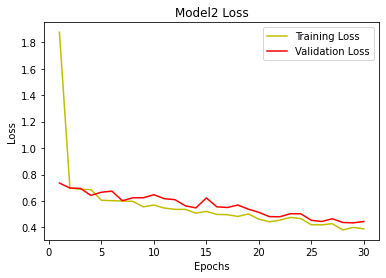

In [135]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Model2 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [129]:
"""acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()"""


"acc = history.history['accuracy']\nval_acc = history.history['val_accuracy']\nepochs = range(1, len(acc) + 1)\nplt.plot(epochs, acc, 'y', label = 'Training Accuracy')\nplt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')\nplt.title('Model Accuracy')\nplt.xlabel('Epochs')\nplt.ylabel('Accuracy')\nplt.legend()\nplt.show()"

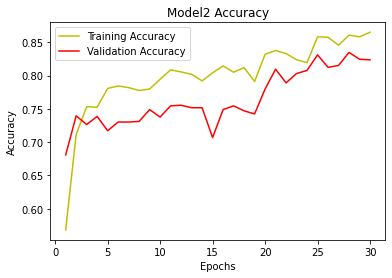

In [134]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'y', label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation Accuracy')
plt.title('Model2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [131]:
results = model2.predict_generator(predict_data)


C:\Users\Miron\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [132]:
#{'NORMAL': 0, 'PNEUMONIA': 1}
class_values = ['NORMAL', 'PNEUMONIA']

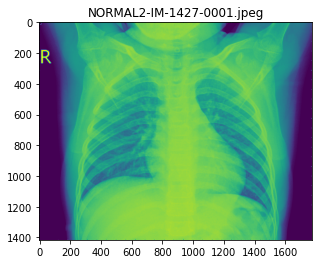

[[0.11801273 0.88441026]]
PNEUMONIA


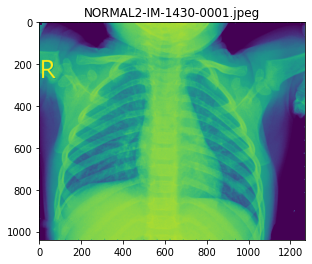

[[0.635912   0.37042058]]
NORMAL


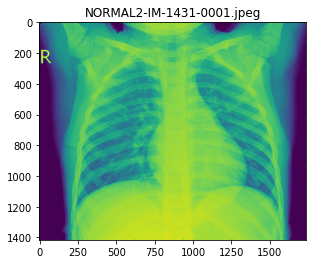

[[0.23180875 0.775983  ]]
PNEUMONIA


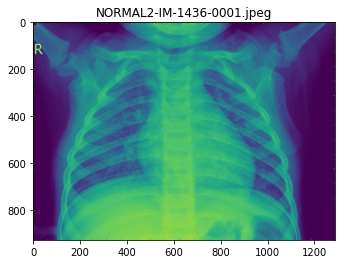

[[0.3108523  0.69262874]]
PNEUMONIA


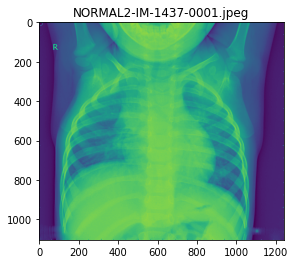

[[0.04239097 0.9580926 ]]
PNEUMONIA


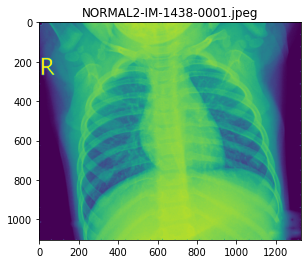

[[0.19092727 0.81703264]]
PNEUMONIA


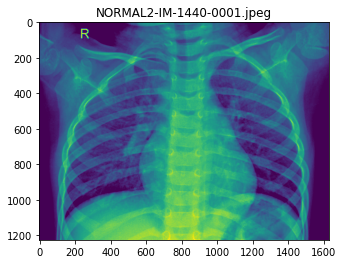

[[0.20013818 0.80926   ]]
PNEUMONIA


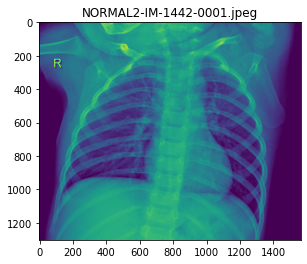

[[0.5335954  0.47179002]]
NORMAL


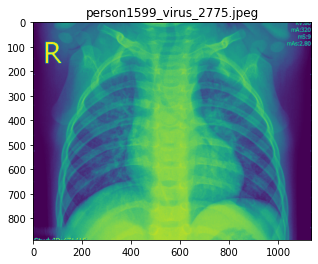

[[0.04828605 0.9523238 ]]
PNEUMONIA


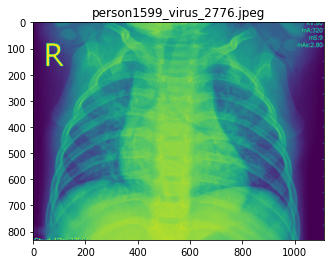

[[0.01746872 0.98277986]]
PNEUMONIA


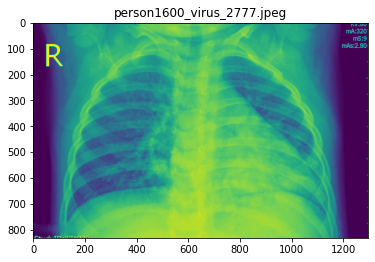

[[0.03531912 0.9666826 ]]
PNEUMONIA


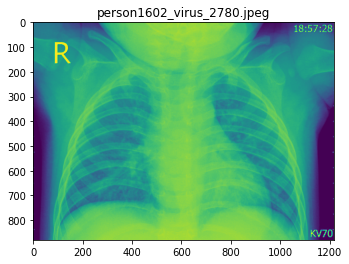

[[0.0566327 0.9461719]]
PNEUMONIA


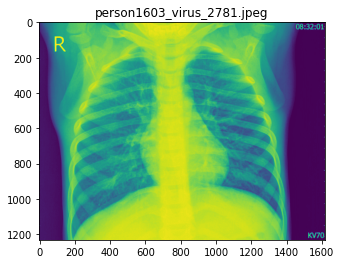

[[0.33730388 0.6701571 ]]
PNEUMONIA


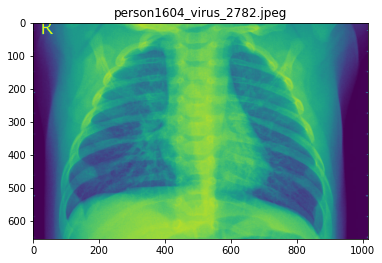

[[0.20362708 0.80301785]]
PNEUMONIA


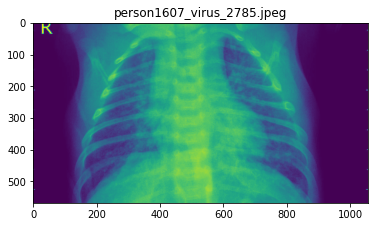

[[0.49967566 0.5083585 ]]
PNEUMONIA


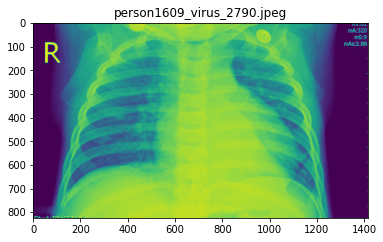

[[0.03363803 0.9676225 ]]
PNEUMONIA


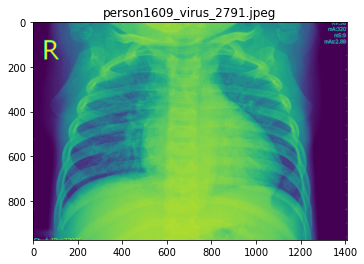

[[0.02434975 0.9758195 ]]
PNEUMONIA


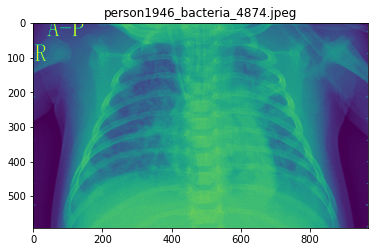

[[0.0348675 0.9659696]]
PNEUMONIA


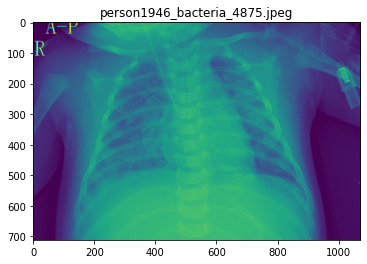

[[0.01629004 0.9836892 ]]
PNEUMONIA


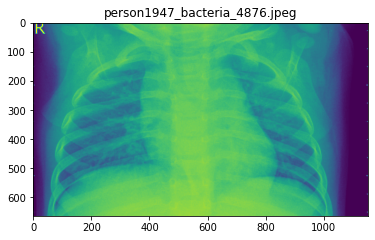

[[0.07887256 0.9234154 ]]
PNEUMONIA


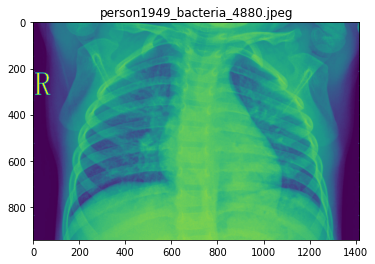

[[0.09896931 0.9071696 ]]
PNEUMONIA


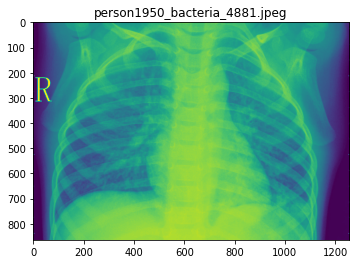

[[0.07401919 0.9304671 ]]
PNEUMONIA


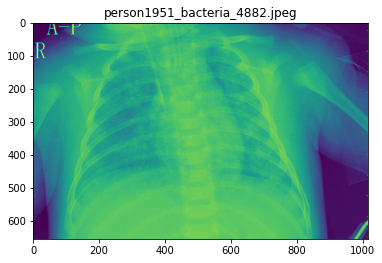

[[0.00335467 0.9966087 ]]
PNEUMONIA


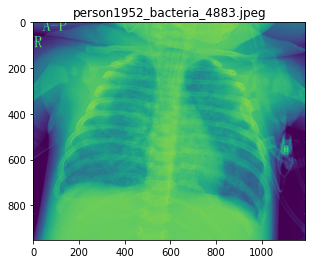

[[0.01202971 0.9879758 ]]
PNEUMONIA


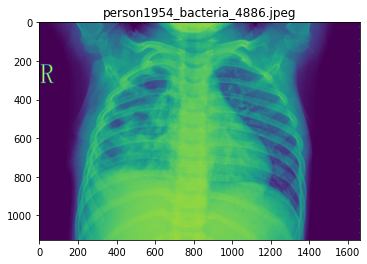

[[0.4731332 0.5321555]]
PNEUMONIA


In [133]:
for category in directory_type:
    path = os.path.join(pred_dir, category)
    for img in os.listdir(path):
        #load the image
        my_image = load_img(pred_dir + '/' + category + '/' + img, target_size=(300, 300), color_mode='grayscale')

        #preprocess the image
        my_image = img_to_array(my_image)
        my_image = my_image.reshape((1, 300, 300, 1))
        my_image = my_image/255  
        #make the prediction
        prediction = model2.predict(my_image)
        

        xray_img = pltimg.imread(pred_dir + '/' + category + '/' + img)
        plt.imshow(xray_img)
        plt.title(img)
        plt.show()
        
        print(prediction)
        print(class_values[np.argmax(prediction)])


